In [136]:
using PyPlot

# Multiplication

### Dot product

Is the similarity between two vectors. How much are they pointing in the same direction?

$$
a \cdot b = \parallel a \parallel_2 \parallel  b \parallel_2 cos (\phi) \tag{proof?!?}
$$

### Matmul

If $C = AB$ then we are taking the dot product of rows of A and columns of B. So each element of C is a measure of similarity between rows/columns of A/B. So, the elements of the first row of C are the similarities between the first row of A and each column of B.

# Eigen vecs/vals

Now that we have the covariances between variables/features of X, we can find their eigen values/vectors. Eigenvectors of a matrix, M, are directions that are not rotated when multiplied by M -- $\mathbf{A}\vec{x} = a\vec{x}$. So, the eigenvectors of our covariance matrix are directions that ???

Why does it even make sense that there are m eigen vectors? It seems weird that there must be directions that are invariant to rotation.

Why should there be eigenvectors? It seems kinda strange.

$Ax = ax \implies (A-aI)x = 0$

Hmm. Eigen vectors are not unique??


Now take whichever eigenvectors you like, but really we want the ones with the greatest eigenvalues. This is because the eigen values are the variances of our eigen vectors. As ... ???

hmm. should these all be positive? - the eigen values

then multiply data . selected eigenvectors. But wait a minute, arent the eigen vectos for the co-variance matrix, not the data? So really, the eigen vectors are ???

# Whitening data

Let; 
* E be a matrix of stacked eigenvectors
* V be the eigenvalues
* M be some matrix e.g. covariance

We can write the diagonalized covariance as: $V = E^TME$. 
So decorrelated variables, is the set eigenvalues. Why/how does this make sense? Isnt this almost exactally what PCA is doing???

Therefore if we set $y= E^Tx$ then y is a decorelated representation of x. (???)

##### Questions
* Can all matrices be decorrelated? Does this depend on rank?
* Where do the damned eigenvectors come from? Why is it that there (must??) exist a set of orthogonal axes that each ...

##### Resources
* http://courses.media.mit.edu/2010fall/mas622j/whiten.pdf
* https://theclevermachine.wordpress.com/2013/03/30/the-statistical-whitening-transform/

# Singular value decomposition
Used as an alternative way to find eigen vectors? Why?

From before. $Av = \lambda v \therefore V\Lambda V^{-1} = A$

##### Positive semidefinite normal
Must matrix to be factored must be a positive semidefinite normal matrix. What garuntee do we have that our matrix, M, will satisfy this requirement? Well, we are doing SVD on a correlation matrix. A correlation matrix is symmetric by definition, and ??? (which is why we always have positive values for our principle components/eigen values??)

##### M = USV

> * The columns of V (right-singular vectors) are eigenvectors of M∗M.
* The columns of U (left-singular vectors) are eigenvectors of MM∗.
* The non-zero elements of Σ (non-zero singular values) are the square roots of the non-zero eigenvalues of M∗M or MM∗.

Show/prove? this

Let Ax = ax, aka x is an eigen vector of A. Then let A = USV, then Ux = ? = xV = x? As eigen vectors are only scaled, not rotated. 
What does U and V mean? I know they are rotations, (why??) but where do they rotate us?

### How to find U,S,V

How do you find these?? Maybe that will shed some light on what they are.

$\mathbf {M} =\sum _{i}\mathbf {A} _{i}=\sum _{i}\sigma _{i}\mathbf {U} _{i}\otimes \mathbf {V} _{i}^{\dagger }$ where $A = u\otimes v$.


### Relation to eigenvalue decomposition

<i>
> Given an SVD of M, as described above, the following two relations hold:
$$\begin{aligned}\mathbf {M} ^{*}\mathbf {M} &=\mathbf {V} {\boldsymbol {\Sigma }}^{*}\mathbf {U} ^{*}\,\mathbf {U} {\boldsymbol {\Sigma }}\mathbf {V} ^{*}=\mathbf {V} ({\boldsymbol {\Sigma }}^{*}{\boldsymbol {\Sigma }})\mathbf {V} ^{*}\\\mathbf {M} \mathbf {M} ^{*}&=\mathbf {U} {\boldsymbol {\Sigma }}\mathbf {V} ^{*}\,\mathbf {V} {\boldsymbol {\Sigma }}^{*}\mathbf {U} ^{*}=\mathbf {U} ({\boldsymbol {\Sigma }}{\boldsymbol {\Sigma }}^{*})\mathbf {U} ^{*}\end{aligned} $$
The right-hand sides of these relations describe the eigenvalue decompositions of the left-hand sides. Consequently:
* The columns of V (right-singular vectors) are eigenvectors of $M^{-1}M$.
* The columns of U (left-singular vectors) are eigenvectors of $MM^{-1}$.
* The non-zero elements of Σ (non-zero singular values) are the square roots of the non-zero eigenvalues of M∗M or MM∗.</i>

Ahh. That makes some more sense?

$\therefore W = M^TM = V_M \Sigma_M^T \Sigma_M V_M^T = U_W\Sigma_W V^T_W$ which means $V_M = U_W, V_M^T = V^T_W$. I guess this makes sense. As the covariance matrix is symmetric. But now I am confused as we are using the eigen vectors as rotations, but normally they only scale the matrix, in fact that is their definition.

https://www.ling.ohio-state.edu/~kbaker/pubs/Singular_Value_Decomposition_Tutorial.pdf


$$
USV^T = \\
\begin{bmatrix}
u_{11} & u_{12} & u_{13} & u_{14} \\
u_{21} & u_{22} & u_{23} & u_{24} \\
u_{31} & u_{32} & u_{33} & u_{34} \\
u_{41} & u_{42} & u_{43} & u_{44} \\
\end{bmatrix}
\begin{bmatrix}
s_{11} & 0 & 0 \\
0 & s_{22} & 0 \\
0 & 0 & s_{33} \\
0 & 0 & 0 \\
\end{bmatrix}
\begin{bmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23} \\
v_{31} & v_{32} & v_{33} \\
\end{bmatrix} \\
=\begin{bmatrix}
s_{11}u_{11} & s_{22}u_{12} & s_{33}u_{13} \\
s_{11}u_{21} & s_{22}u_{22} & s_{33}u_{23} \\
s_{11}u_{31} & s_{22}u_{32} & s_{33}u_{33} \\
s_{11}u_{41} & s_{22}u_{42} & s_{33}u_{43} \\
\end{bmatrix}
\begin{bmatrix}
v_{11} & v_{12} & v_{13} \\
v_{21} & v_{22} & v_{23} \\
v_{31} & v_{32} & v_{33} \\
\end{bmatrix} \\
= \begin{bmatrix}
v_{11}s_{11}u_{11} + v_{21}s_{22}u_{12} + v_{31}s_{33}u_{13} & v_{12}s_{11}u_{11} + v_{22}s_{22}u_{12} + v_{32}s_{33}u_{13} & v_{13}s_{11}u_{11} + v_{23}s_{22}u_{12} + v_{33}s_{33}u_{13} \\
v_{11}s_{11}u_{21} + v_{21}s_{22}u_{22} + v_{31}s_{33}u_{23} & v_{12}s_{11}u_{21} + v_{22}s_{22}u_{22} + v_{32}s_{33}u_{23} & v_{13}s_{11}u_{21} + v_{23}s_{22}u_{22} + v_{33}s_{33}u_{23} \\
v_{11}s_{11}u_{31} + v_{21}s_{22}u_{32} + v_{31}s_{33}u_{33} & v_{12}s_{11}u_{31} + v_{22}s_{22}u_{32} + v_{32}s_{33}u_{33} & v_{13}s_{11}u_{31} + v_{23}s_{22}u_{32} + v_{33}s_{33}u_{33} \\
v_{11}s_{11}u_{41} + v_{21}s_{22}u_{42} + v_{31}s_{33}u_{43} & v_{12}s_{11}u_{41} + v_{22}s_{22}u_{42} + v_{32}s_{33}u_{43} & v_{13}s_{11}u_{41} + v_{23}s_{22}u_{42} + v_{33}s_{33}u_{43} \\
\end{bmatrix}
$$

## Questions

* When can a matrix not be decomposed into eigenvectors? (existince)
* Uniquness. When do 
* Why is the decomposition so popular? And so useful?

In [140]:
n_inputs = 2
n_outputs = 2
sigma = randn((n_outputs,n_inputs)) #covariance matrix of YX
U,S,V = svd(sigma)

(
2x2 Array{Float64,2}:
  0.97041   -0.241464
 -0.241464  -0.97041 ,

[1.5202973729066018,0.9707899978044175],
2x2 Array{Float64,2}:
  0.477164  0.878814
 -0.878814  0.477164)

In [141]:
leftM = sigma * transpose(sigma)
rightM = transpose(sigma)*sigma

print(leftM,"\n")
print(rightM)

[2.2314922391223275 -0.32075255536693587
 -0.32075255536693587 1.0222450827814886]
[1.2541052522502685 -0.5740203081661442
 -0.5740203081661442 1.9996320696535477]

In [142]:
leftM*U

2x2 Array{Float64,2}:
  2.24291   -0.227564
 -0.558097  -0.914546

In [143]:
rightM*transpose(V)

2x2 Array{Float64,2}:
 0.0939566  -1.37603
 1.4834      1.45861

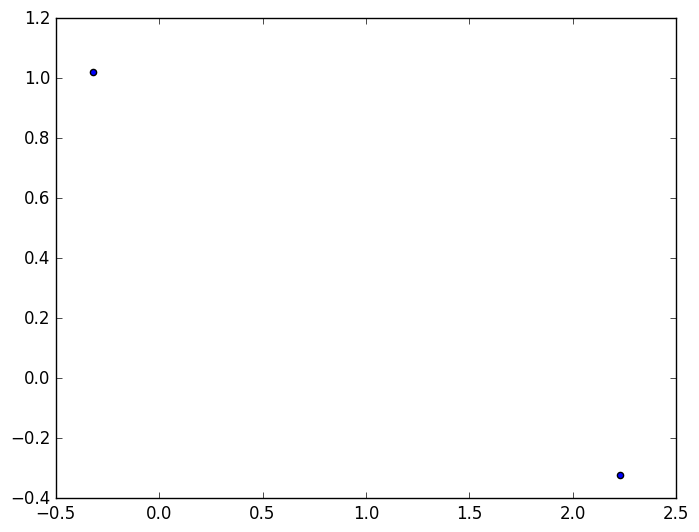

PyObject <matplotlib.collections.PathCollection object at 0x31a32b470>

In [144]:
PyPlot.scatter(leftM[:,1],leftM[:,2])

# Rank and Linear independence

If we have two vectors, $x,y \in \mathbb{R}$, such that $x = [1,4], y = [2,8]$ then these vectors are _linearly dependent_ as y = 2x. Therefore, by composing x and y we can only ever get vectors on a line. However, 


* Do that proof thingy of rows = columns.
* Random init = full rank with probability 1 ?!?

In [16]:
a = [2 3 7; 4 5 10 ; 3 1 6]
print("Rank\n",a,"\n= ",LinAlg.rank(a))

Rank
[2 3 7
 4 5 10
 3 1 6]
= 3

# Projection

##### Projection
Let U = (mxm), S = (mxn), V^T = (nxn)
$$
\begin{align}
P_A &= A(A^TA)^{-1}A^T \\
M &= USV^T \\
P_A &= (USV^T) ((USV^T)^T(USV^T))^{-1} (USV^T)^T \\
P_A &= USV^T (VS^TU^TUSV^T)^{-1} (VS^TU^T) \\
P_A &= USV^T (VS^2V^T)^{-1} (VS^TU^T) \\
\end{align}
$$

# Orthogonal matrix

$A^T = A^{-1}$ Proof?

Why are covariance matrices orthogonal?

> _"Orthogonality and statistical independence are not synonyms."_ [SE](http://stats.stackexchange.com/questions/110508/questions-on-pca-when-are-pcs-independent-why-is-pca-sensitive-to-scaling-why)

### Orthogonal projections 

Let x be some vector and L be a subspace such that $L = span(v) = \{cv : c \in \mathbb{R}\}$. Then the projection of x onto L, $proj_L(x) = \frac{x\cdot v}{v \cdot v}v$

$P_A = P_A^2$ <- proof??

$P_A = A^T(A^TA)^{-1}A$

# Positive semi definite
***
> _"positive definiteness is a sufficient condition for strict convexity"_ [SE](http://math.stackexchange.com/questions/210187/relation-between-positive-definite-matrix-and-strictly-convex-function)

Convexity of what? Prove!

***
Prove that a covariance matrix is always positive semi-definite.
http://math.stackexchange.com/questions/114072/what-is-the-proof-that-covariance-matrices-are-always-semi-definite

***

# Norms

$$
\begin{align}
\parallel v \parallel &= \sqrt{v_1^2 + v_2^2 ... v_d^2} \tag{from pythagoras} \\
&= \sqrt{v\cdot v} \tag{} \\
\therefore \parallel v \parallel^2 &= v\cdot v \\
\end{align}
$$

$\left\|\mathbf {x} \right\|_{p}:={\bigg (}\sum _{i=1}^{n}\left|x_{i}\right|^{p}{\bigg )}^{1/p}$

# Inverses

$I = AA^{-1} = A^{-1}A$. If A is square, what if it's not??

Rank deficient case -- https://en.wikipedia.org/wiki/Moore%E2%80%93Penrose_pseudoinverse

# TODO

* Subspaces?!?
* Pictures!!!
